## EDA (analisis exploratorio)

In [ ]:
# importamos las librerias a utilizar

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from ast import literal_eval
import ast
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# dataframes importados de ETL
movies=pd.read_csv('/content/drive/MyDrive/Kaarla,/peliculas.csv')
credits=pd.read_csv('/content/drive/MyDrive/Kaarla,/credits_peliculas.csv')


In [ ]:
# tamaño de los dataframes
print('movies')
print(movies.shape)
print('------------------------')
print('credits')
print(credits.shape)

movies
(45363, 20)
------------------------
credits
(45439, 3)


In [ ]:
# recuento de nulos por dataframe
print('movies :')
print(movies.info())
print('--------------------------------------')
print('credits : ')
print(credits.info())

movies :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45363 entries, 0 to 45362
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  45363 non-null  object 
 1   budget                 45363 non-null  float64
 2   genres                 45363 non-null  object 
 3   id                     45363 non-null  int64  
 4   original_language      45352 non-null  object 
 5   overview               44422 non-null  object 
 6   popularity             45363 non-null  float64
 7   production_companies   45363 non-null  object 
 8   production_countries   45363 non-null  object 
 9   release_date           45363 non-null  object 
 10  revenue                45363 non-null  float64
 11  runtime                45117 non-null  float64
 12  spoken_languages       45363 non-null  object 
 13  status                 45283 non-null  object 
 14  tagline                20394 non-null  object

In [ ]:
#conteo de duplicados en movies
movies.duplicated().value_counts()

False    45359
True         4
dtype: int64

In [ ]:
# eliminacion de duplicados

movies=movies.drop_duplicates()

In [ ]:
# recreamos los indices del dataframe

movies=movies.reset_index(drop=True)

In [ ]:
# realizamos el cambio de tipo de algunas variables pertinentes

movies['release_date'] = movies['release_date'].astype('datetime64[ns]')

In [ ]:
movies['original_language'] = movies['original_language'].astype("object")
movies['status'] = movies['status'].astype("object")

In [ ]:
#descripcion estadistica sobre variables numericas
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.535900e+04,45359.000000,45359.000000,4.535900e+04,45113.000000,45359.000000,45359.000000,45359.000000,4.535900e+04
mean,4.234169e+06,108026.198836,2.926491,1.123427e+07,94.179726,5.624176,110.121431,1991.883132,6.602902e+02
std,1.744294e+07,112177.776233,6.010366,6.440166e+07,38.345705,1.915294,491.831125,24.052875,7.470729e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26386.500000,0.388855,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59852.000000,1.130406,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156538.000000,3.691946,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


 -  de la descripcion anterior se puede inferir que  existe vacios en la columna **runtime** , en la columna  **vote_average** existe una distribucion de datos de forma acmapanada o simetrica . mientras que en el resto siguen una distribucion asimetrica o sesgada .

In [ ]:
# descripcion estadista sobre variables categoricas

movies[['original_language','overview','status','tagline','title']].describe() #include = ["object"]

,original_language,overview,status,tagline,title
count,45348,44418,45279,20393,45359
unique,89,44232,6,20269,42196
top,en,No overview found.,Released,Based on a true story.,Cinderella
freq,32192,133,44920,7,11


In [ ]:
# rellenemos datos vacios de columna runtime  usando  mediana (segun la descripcion estadistica  estas dos medidas no difieren significativamente)

movies['runtime']=movies['runtime'].fillna(movies['runtime'].median())

In [ ]:
# conversion de str a diccionario en la columna belong_collection

movies['belongs_to_collection']= movies.belongs_to_collection.apply(literal_eval)

In [ ]:
# reasignamos la columna belong_collection a solo el nombre de la franquicia o serie de películas que pertenece la película

movies['belongs_to_collection']=movies['belongs_to_collection'].apply(lambda x: x['name'])

In [ ]:
# funcion de conversion de las columnas anidadas
# : genres,production_companies ,production_countries ,spoken languages ,cast : extraccion de nombres

def conversion_listas_Dict(columna):
    o=[]
    for i in range(len(columna)):
        p=[]
        for j in range(len(ast.literal_eval(columna[i]))):
            p.append(ast.literal_eval(columna[i])[j]['name'])
        o.append(p) # lista de listas
    ser1=pd.Series(o)
    return ser1

In [ ]:
# para la columna crew :

def conversion_listas_Dicc(columna):
    o=[]
    for i in range(len(columna)):
        p=[]
        for j in range(len(ast.literal_eval(columna[i]))):
            if ast.literal_eval(columna[i])[j]['job']=='Director':
               p.append(ast.literal_eval(columna[i])[j]['name'])
        o.append(p)
    serie=pd.Series(o)
    return serie

In [ ]:
# conversion de las columnas cast , genres,production_companies ,production_countries ,spoken language a listas

credits['cast']=conversion_listas_Dict(credits['cast']) # extraccion de nombres de actores
movies['genres']=conversion_listas_Dict(movies['genres'])
movies['production_companies']=conversion_listas_Dict(movies['production_companies'])
movies['production_countries']=conversion_listas_Dict(movies['production_countries'])
movies['spoken_languages']=conversion_listas_Dict(movies['spoken_languages'])

In [ ]:
#conversion de la columna crew : extraccion de nombre de director
credits['crew']=conversion_listas_Dicc(credits['crew'])

In [ ]:
movies.head(2) #vista previa posttransformacion del dataframe movies

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
0,sin_dato,0.0,"[Drama, Crime]",2,fi,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,"[Villealfa Filmproduction Oy, Finnish Film Fou...",[Finland],1988-10-21,0.0,69.0,"[suomi, Deutsch]",Released,NaN,Ariel,7.1,44.0,1988,0.0
1,sin_dato,0.0,"[Drama, Comedy]",3,fi,"An episode in the life of Nikander, a garbage ...",2.292110,[Villealfa Filmproduction Oy],[Finland],1986-10-16,0.0,76.0,"[English, suomi, svenska]",Released,NaN,Shadows in Paradise,7.1,35.0,1986,0.0


In [ ]:
credits.head(2) #vista previa  posttransformacion del dataframe credits

,cast,crew,id
0,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...",[Aki Kaurismäki],2
1,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman...",[Aki Kaurismäki],3


In [ ]:
# generamos el dataframe result a partir de la union de los dos datraframes
movies_credits=movies.merge(credits, on='id')

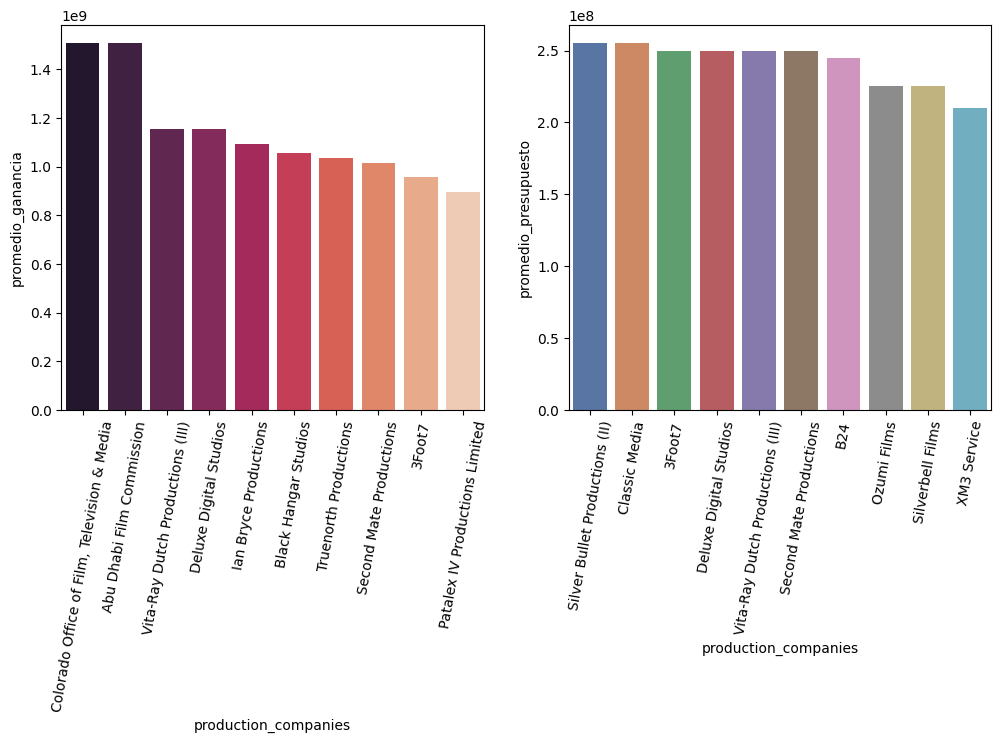

In [ ]:
# top 10  de compañias productoras de films respecto a presupuesto y ganancia

fig, axs = plt.subplots(ncols=2,  figsize=(12, 5))
sns.barplot(data=movies[['budget','production_companies']].explode('production_companies').groupby('production_companies')['budget'].mean().reset_index(name='promedio_presupuesto').sort_values(by='promedio_presupuesto',ascending=False).head(10), x='production_companies', y='promedio_presupuesto',palette="deep",ax=axs[1]).set_xticklabels(sns.barplot(data=movies[['budget','production_companies']].explode('production_companies').groupby('production_companies')['budget'].mean().reset_index(name='promedio_presupuesto').sort_values(by='promedio_presupuesto',ascending=False).head(10), x='production_companies', y='promedio_presupuesto',palette="deep",ax=axs[1]).get_xticklabels(),rotation=80)
sns.barplot(data=movies[['revenue','production_companies']].explode('production_companies').groupby('production_companies')['revenue'].mean().reset_index(name='promedio_ganancia').sort_values(by='promedio_ganancia',ascending=False).head(10), x='production_companies', y='promedio_ganancia',palette="rocket",ax=axs[0]).set_xticklabels(sns.barplot(data=movies[['revenue','production_companies']].explode('production_companies').groupby('production_companies')['revenue'].mean().reset_index(name='promedio_ganancia').sort_values(by='promedio_ganancia',ascending=False).head(10), x='production_companies', y='promedio_ganancia',palette="rocket",ax=axs[0]).get_xticklabels(),rotation=80)
plt.show()

-  del grafico 2  se registra a **Silver Bullet Productions (II)** y **Classic Media** las compañias productoras con mayor presupuesto en promedio en peliculas

-  del grafico 1  se registra a **Colorado Office of Film, Television & Media** y  **Abu Dhabi Film Commission** las compañias productoras con mayor ganancia en promedio en peliculas





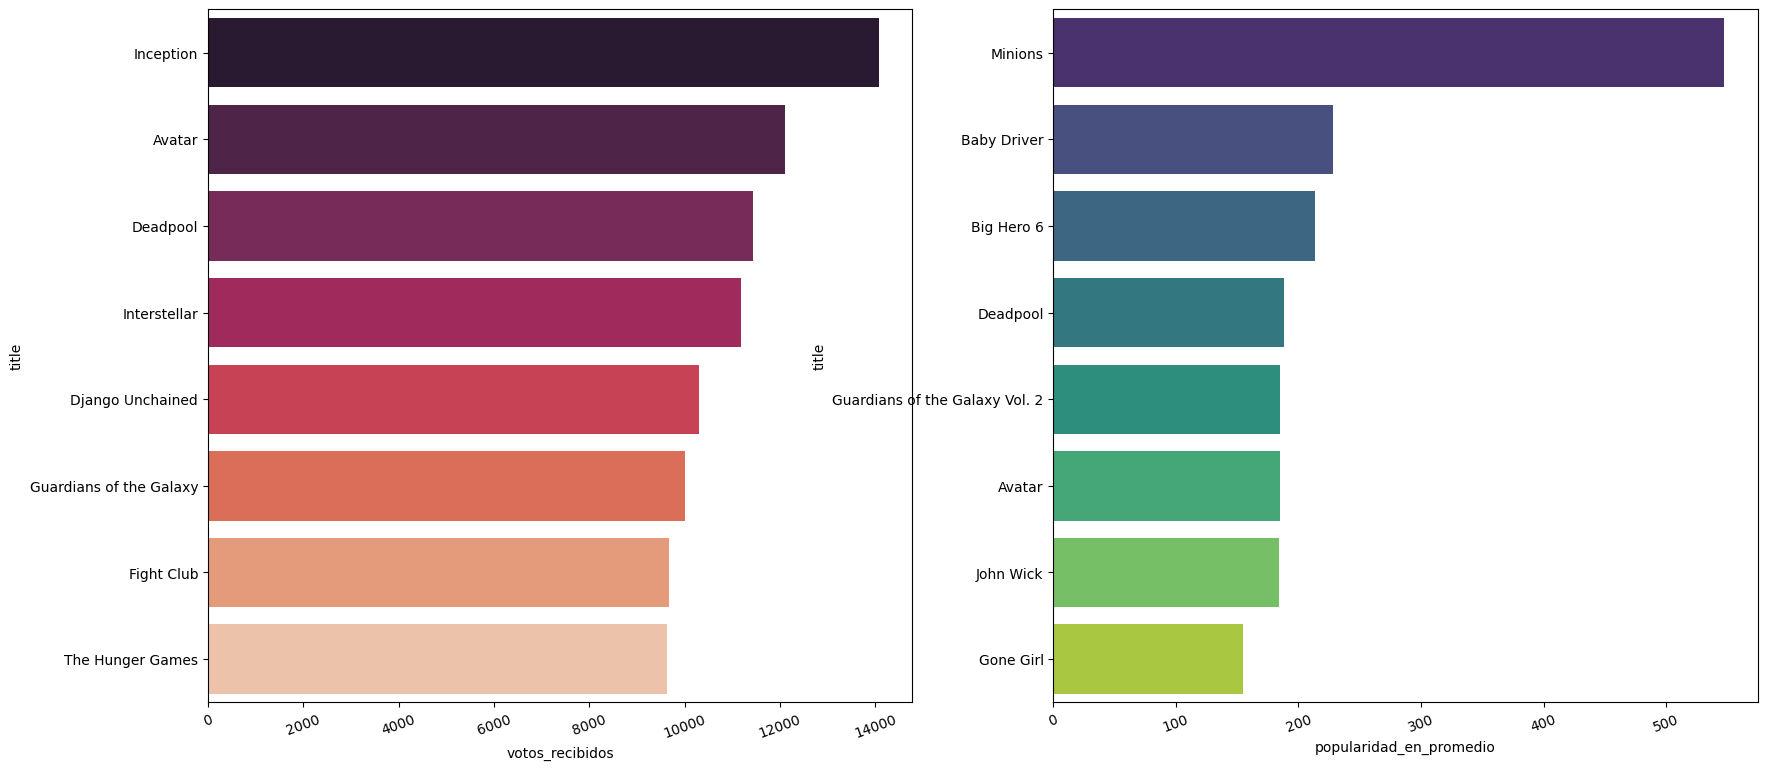

In [ ]:
# las 8 de peliculas con mayor votos recibido y mayor popularidad en promedio

da1=movies[['title','vote_count']].groupby('title')['vote_count'].mean().reset_index(name='votos_recibidos').sort_values(by='votos_recibidos',ascending=False).head(8)
da2=movies[['title','popularity']].groupby('title')['popularity'].mean().reset_index(name='popularidad_en_promedio').sort_values(by='popularidad_en_promedio',ascending=False).head(8)
fig, axs = plt.subplots(ncols=2,  figsize=(20, 9))

sns.barplot(data=da1, x='votos_recibidos', y='title',orient='h',palette="rocket",ax=axs[0]).set_xticklabels(sns.barplot(data=da1, x='votos_recibidos', y='title',orient='h',palette="rocket",ax=axs[0]).get_xticklabels(),rotation=20)
sns.barplot(data=da2, x='popularidad_en_promedio',y='title',orient='h',palette="viridis",ax=axs[1]).set_xticklabels(sns.barplot(data=da2, x='popularidad_en_promedio',y='title',orient='h',palette="viridis",ax=axs[1]).get_xticklabels(),rotation=20)
plt.show()

 -  del grafico 1 se registra a **Inception** como la pelicula con mayor cantidad  de votos en promedio.
 - del grafico 2 se registra  a **minions** como la pelicula con mayor popularidad en promedio

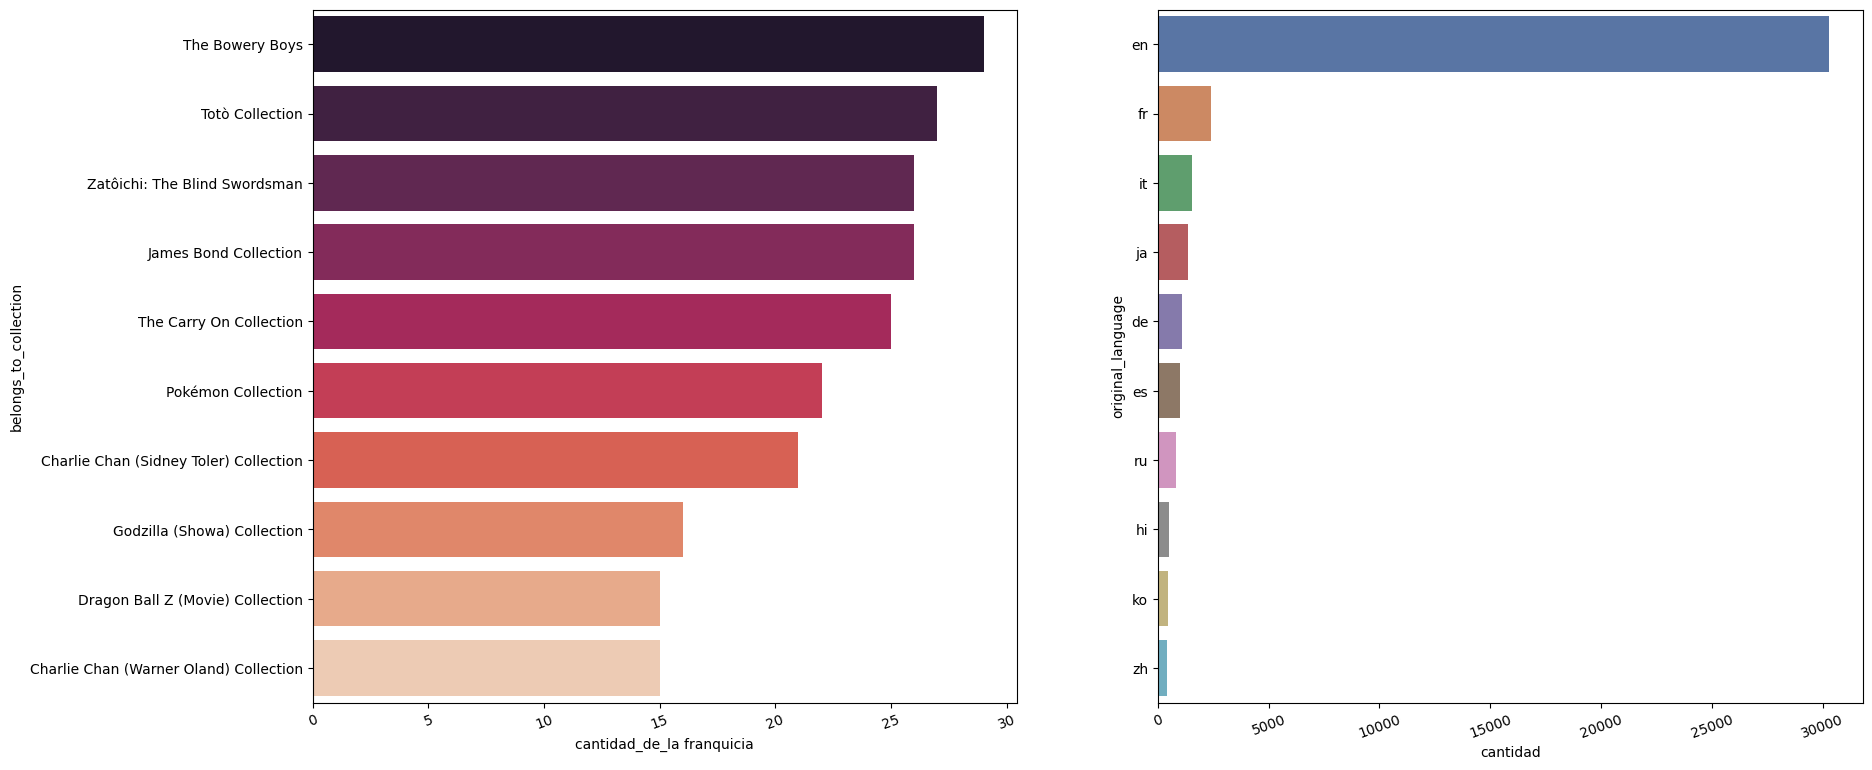

In [ ]:
# las 10 franquicias o series mas frecuentes en peliculas y los 10 idiomas mas usuales en las que se graban

da=movies[['title','belongs_to_collection']].groupby('belongs_to_collection')['title'].count().reset_index(name='cantidad_de_la franquicia').sort_values(by='cantidad_de_la franquicia',ascending=False).iloc[1:11]
do=movies[['original_language','title']].drop_duplicates().groupby(['original_language'])['original_language'].agg([('cantidad','count')]).sort_values(by='cantidad',ascending=False).reset_index().head(10)
fig, axs = plt.subplots(ncols=2,  figsize=(20, 9))

sns.barplot(data=da, x='cantidad_de_la franquicia'  , y='belongs_to_collection',orient='h',palette="rocket",ax=axs[0]).set_xticklabels(sns.barplot(data=da, x='cantidad_de_la franquicia' , y='belongs_to_collection',orient='h',palette="rocket",ax=axs[0]).get_xticklabels(),rotation=20)
sns.barplot(data=do, x='cantidad', y= 'original_language' ,orient='h',palette="deep",ax=axs[1]).set_xticklabels(sns.barplot(data=do, x='cantidad',y='original_language',orient='h',palette="deep",ax=axs[1]).get_xticklabels(),rotation=20)
plt.show()

 - de lo anterior **The Bowery Boys** es  la serie de peliculas mas usual , el **Ingles** es el idioma de grabacion mas frecuente

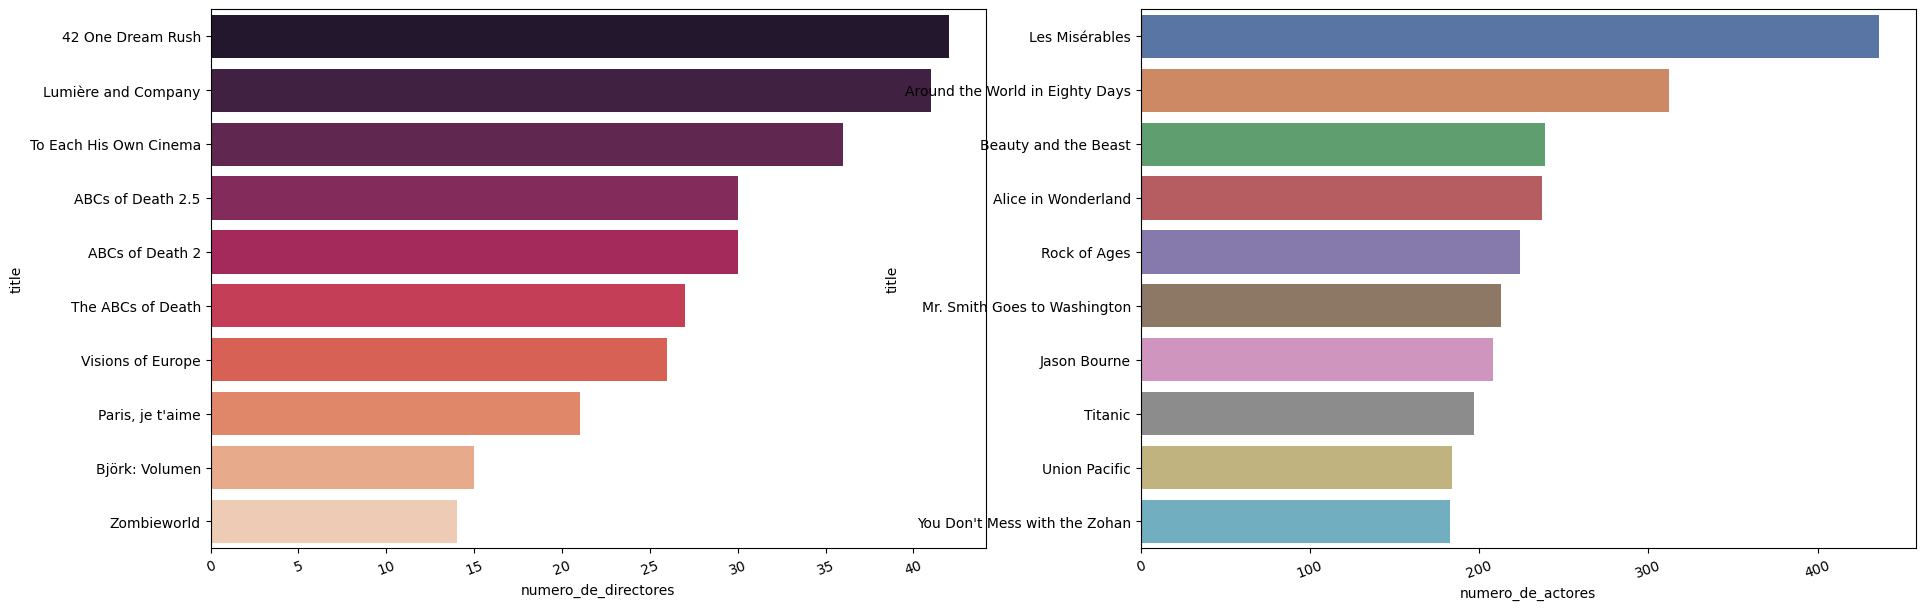

In [ ]:
#el mayor numero de directores y actores en los 10 primeras peliculas

pa=movies_credits[['title','crew']].explode('crew').drop_duplicates().groupby('title')['title'].count().reset_index(name='numero_de_directores').sort_values(by='numero_de_directores',ascending=False).head(10)
ra=movies_credits[['title','cast']].explode('cast').drop_duplicates().groupby('title')['title'].count().reset_index(name='numero_de_actores').sort_values(by='numero_de_actores',ascending=False).head(10)
fig, axs = plt.subplots(ncols=2,  figsize=(22, 7))
sns.barplot(data=pa, x='numero_de_directores', y='title',orient='h',palette="rocket",ax=axs[0]).set_xticklabels(sns.barplot(data=pa, x='numero_de_directores', y='title',orient='h',palette="rocket",ax=axs[0]).get_xticklabels(),rotation=20)
sns.barplot(data=ra, x='numero_de_actores',y='title',orient='h',palette="deep",ax=axs[1]).set_xticklabels(sns.barplot(data=ra, x='numero_de_actores',y='title',orient='h',palette="deep",ax=axs[1]).get_xticklabels(),rotation=20)

plt.show()

 -  **42 One Dream Rush**  la pelicula con mayor cantidad de directores y **Les Miserables** pelicula con mayor cantidad de actores  

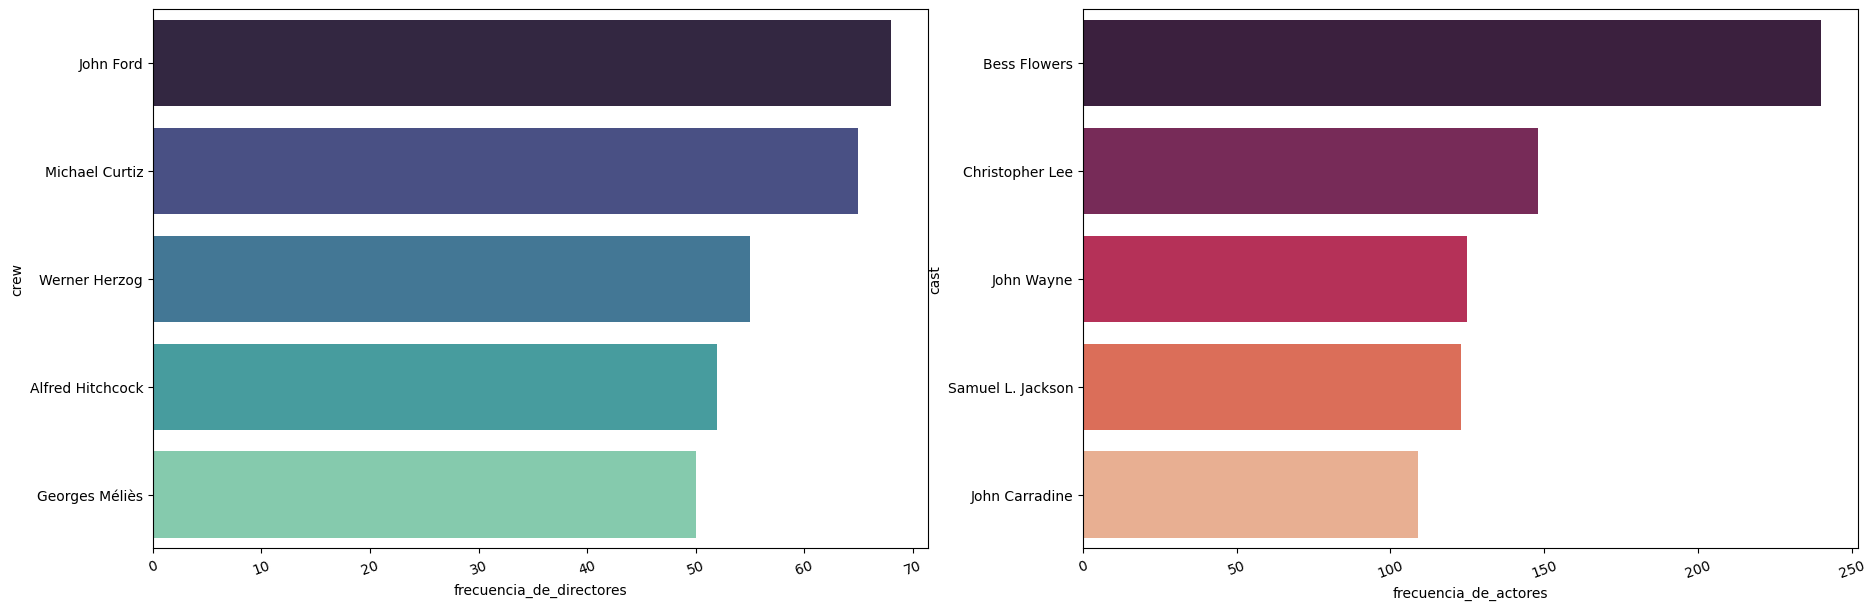

In [ ]:
# numero de directores y actores mas frecuentes en los films

p1=movies_credits[['title','crew']].explode('crew').drop_duplicates().groupby('crew')['crew'].count().reset_index(name='frecuencia_de_directores').sort_values(by='frecuencia_de_directores',ascending=False).head(5)
r1=movies_credits[['title','cast']].explode('cast').drop_duplicates().groupby('cast')['cast'].count().reset_index(name='frecuencia_de_actores').sort_values(by='frecuencia_de_actores',ascending=False).head(5)
fig, axs = plt.subplots(ncols=2,  figsize=(22, 7))
sns.barplot(data=p1, x='frecuencia_de_directores', y='crew',orient='h',palette="mako",ax=axs[0]).set_xticklabels(sns.barplot(data=p1, x='frecuencia_de_directores', y='crew',orient='h',palette="mako",ax=axs[0]).get_xticklabels(),rotation=20)
sns.barplot(data=r1, x='frecuencia_de_actores',y='cast',orient='h',palette="rocket",ax=axs[1]).set_xticklabels(sns.barplot(data=r1, x='frecuencia_de_actores',y='cast',orient='h',palette="rocket",ax=axs[1]).get_xticklabels(),rotation=20)
plt.show()


 - el director **Jhon Ford** es el mas frecuente entre las peliculas
 - mientras que  **Bess Flowers** es la actriz con mayor participacion en los films

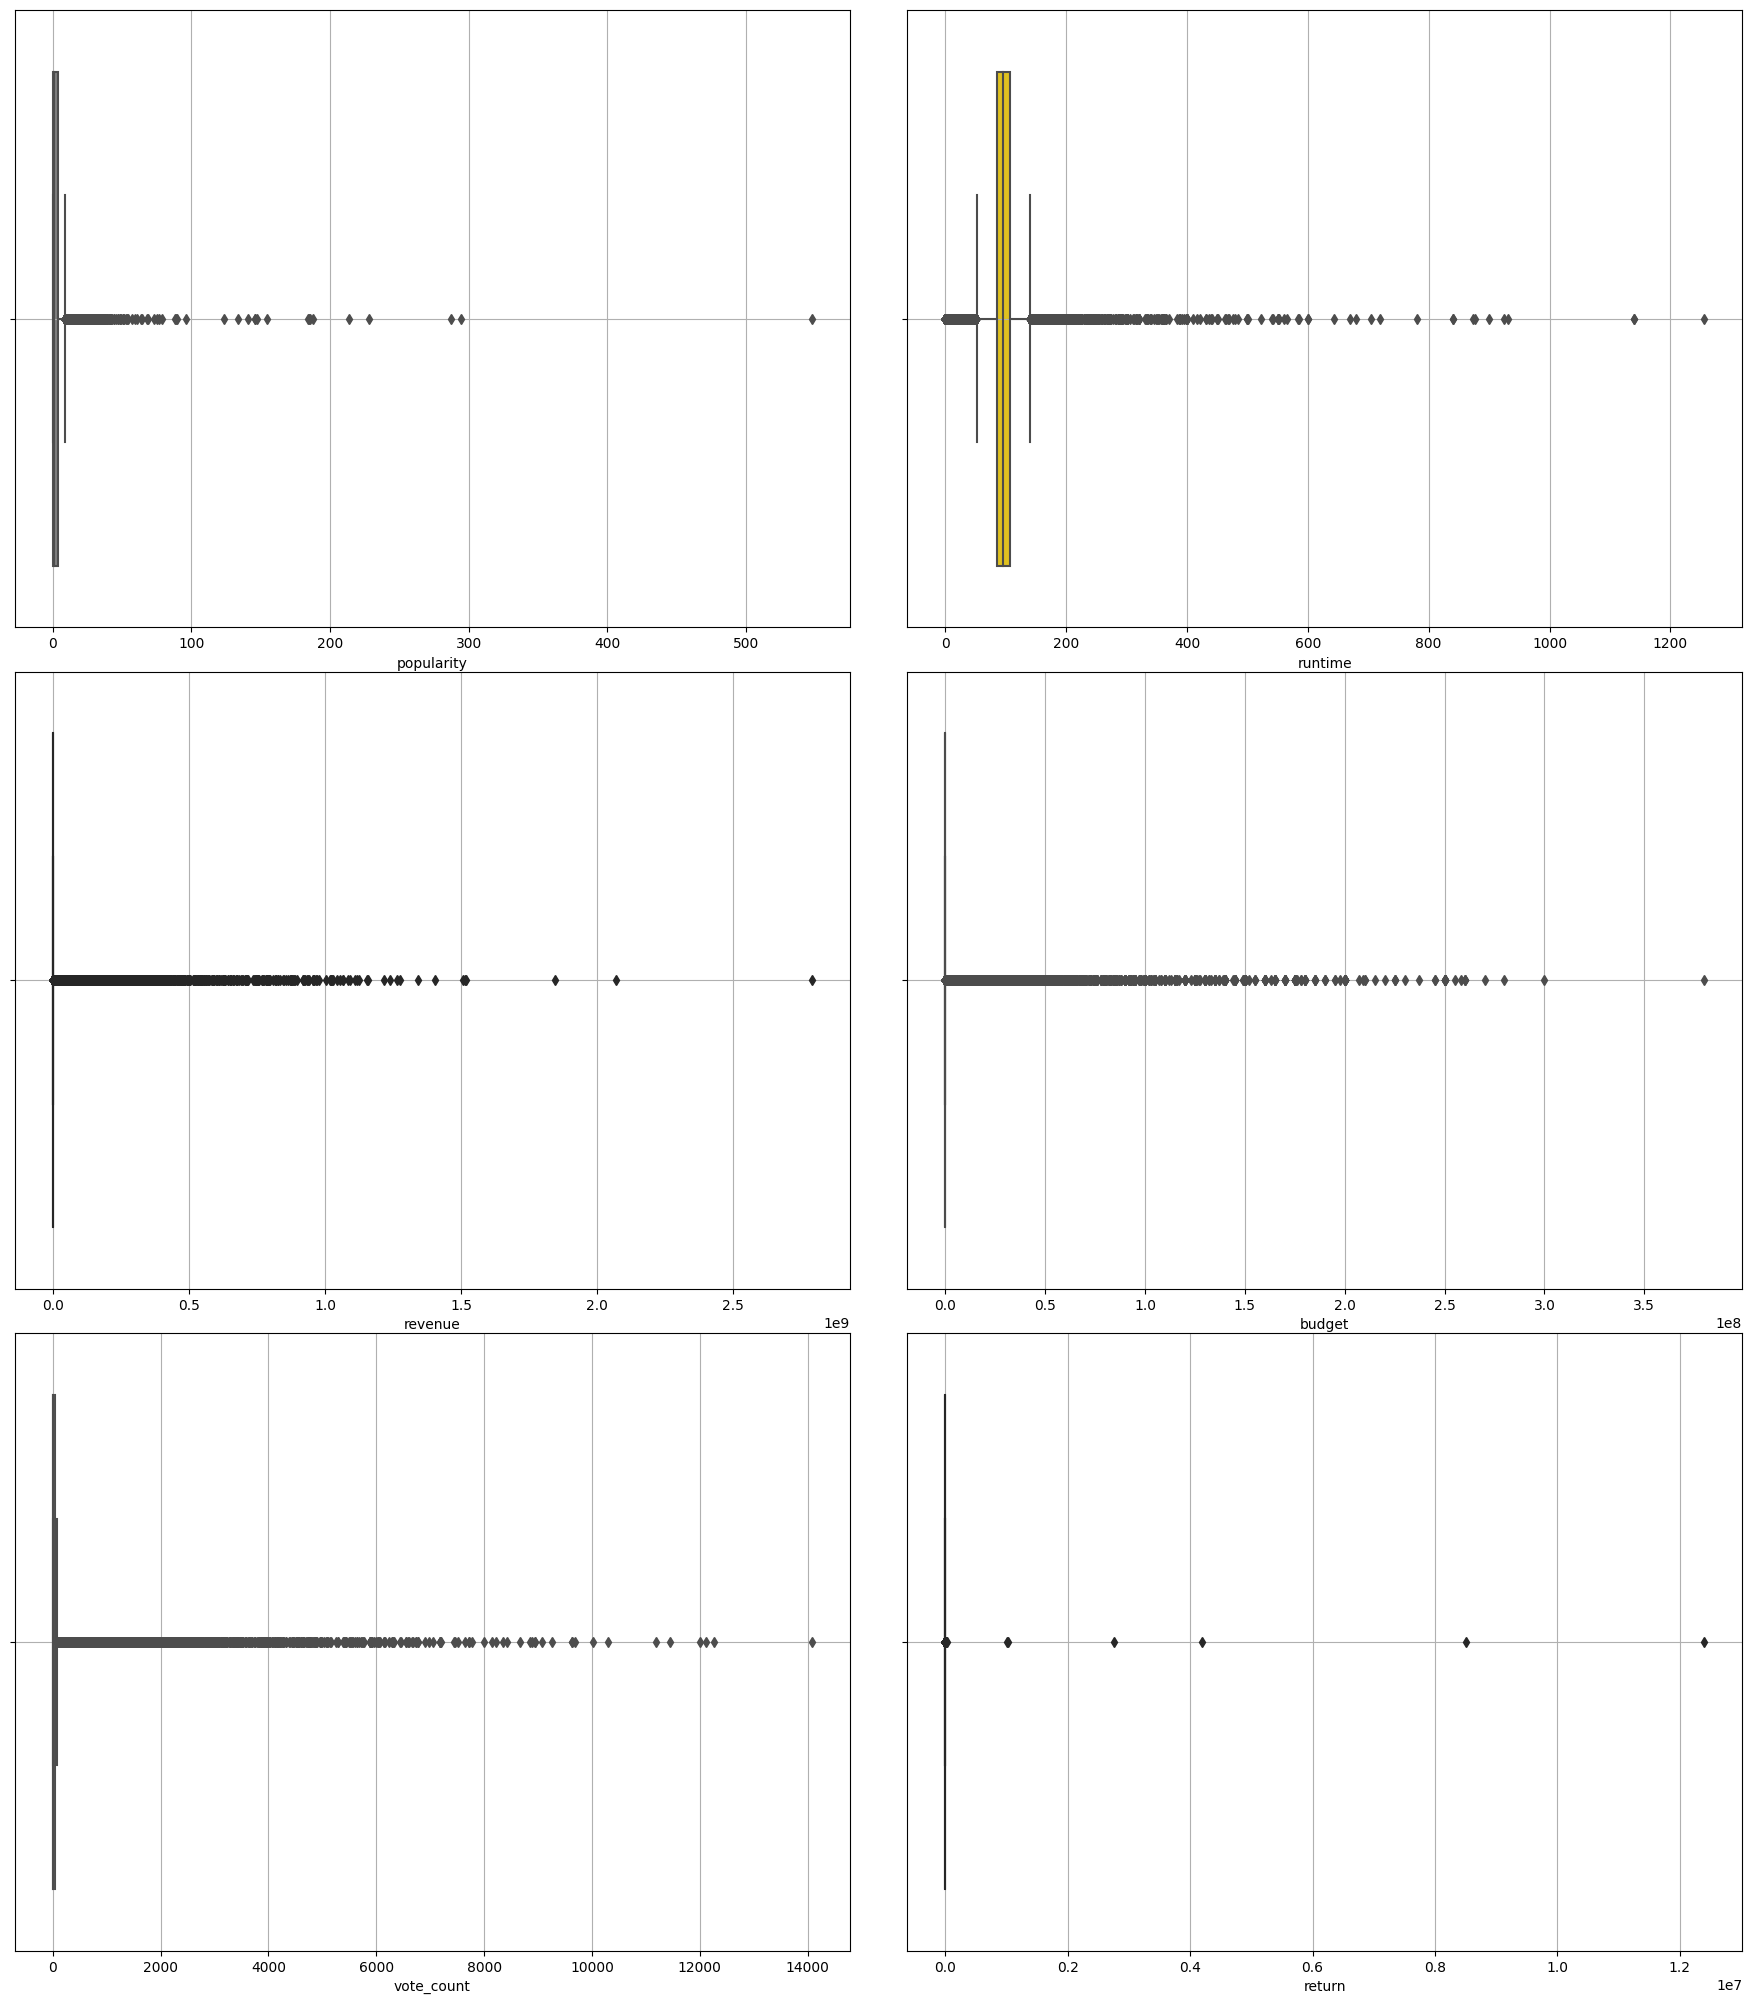

In [ ]:
# diagrama de caja para variables numericas popularity , runtime, revenue , budget, vote_count, return

f, axes = plt.subplots(3,2, figsize = (18,20))
f.tight_layout()
sns.boxplot(x=movies['popularity'],color='grey', ax=axes[0,0]).grid()
sns.boxplot(x=movies['runtime'], color='gold',ax=axes[0,1]).grid()
sns.boxplot(x=movies['revenue'], color='green',ax=axes[1,0]).grid()
sns.boxplot(x=movies['budget'],color='red', ax=axes[1,1]).grid()
sns.boxplot(x=movies['vote_count'], color='grey',ax=axes[2,0]).grid()
sns.boxplot(x=movies['return'], color='green',ax=axes[2,1]).grid()

In [ ]:
# datos atipicos encontrados
def datos_atipicos(columna):
    atipicos4 = []
    columna1 = columna.sort_values(ascending=True)
    q1 = columna1.quantile(0.25)
    q3 =columna1.quantile(0.75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    dtos4=list(columna1)
    for i in dtos4:
        if (i<lwr_bound or i>upr_bound):
            atipicos4.append(i)
    return {'nombre_de_la_variable' :columna.name,'cantidad de atipicos': len(atipicos4) }

In [ ]:
#cantidad de datos atipicos u outliers en las variables numericas mencionadas .

datos_atipicos_en_popularidad=datos_atipicos(movies['popularity'])
datos_atipicos_en_runtime=datos_atipicos(movies['runtime'])
datos_atipicos_en_revenue=datos_atipicos(movies['revenue'])
datos_atipicos_en_budget=datos_atipicos(movies['budget'])
print(datos_atipicos_en_popularidad)
print(datos_atipicos_en_runtime)
print(datos_atipicos_en_revenue)
print(datos_atipicos_en_budget)

{'nombre_de_la_variable': 'popularity', 'cantidad de atipicos': 4206}
{'nombre_de_la_variable': 'runtime', 'cantidad de atipicos': 5387}
{'nombre_de_la_variable': 'revenue', 'cantidad de atipicos': 7404}
{'nombre_de_la_variable': 'budget', 'cantidad de atipicos': 8885}


In [ ]:
# si se realiza la inputacion de valores atipicos las reemplazamos por percentiles, consideremos analizar por percentiles
# sea
movies_copia=movies.copy()

In [ ]:
#  para la columna popularity, calculemos los percentiles :

PERCENTIL90= movies_copia.popularity.quantile(0.9)
PERCENTIL10= movies_copia.popularity.quantile(0.1)
print({'percentil 90':PERCENTIL90,'percentil 10':PERCENTIL10})

{'percentil 90': 8.334566200000001, 'percentil 10': 0.08590640000000001}


In [ ]:
# inputacion de valores atipicos con los percentiles 90 y 10

movies_copia['popularity'] = np.where((movies_copia['popularity'] > 8.334566200000001  ), 8.334566200000001 , movies_copia['popularity'])
movies_copia['popularity'] = np.where((movies_copia['popularity'] < 0.08590640000000001 ), 0.08590640000000001 , movies_copia['popularity'])

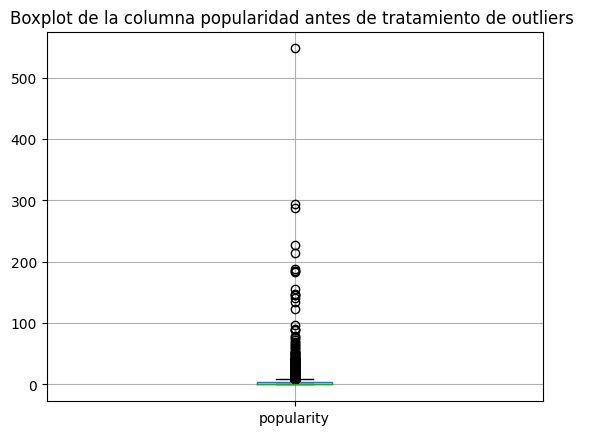

In [ ]:
#diagrama de caja para la columna popularity antes del tratamiento de outliers

movies.boxplot( column =['popularity'], grid = True)
plt.title("Boxplot de la columna popularidad antes de tratamiento de outliers ")
plt.show()

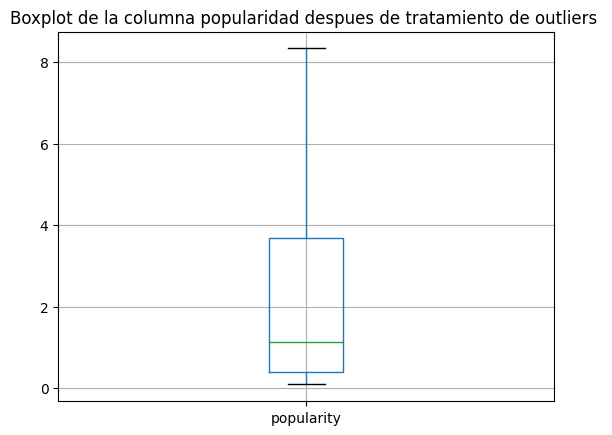

In [ ]:
# diagrama de caja despues del tratamiento de outliers
#  analizamos los datos de la columna  popularity despues de inputar los outliers por los percentiles 90 y 10

movies_copia.boxplot( column =['popularity'], grid = True)
plt.title("Boxplot de la columna popularidad despues de tratamiento de outliers ")
plt.show()

 - la columna popularida esta libre de outliers . pero ello cambiara el nivel de popularidad de las peliculas que se tenia anteriormente?.

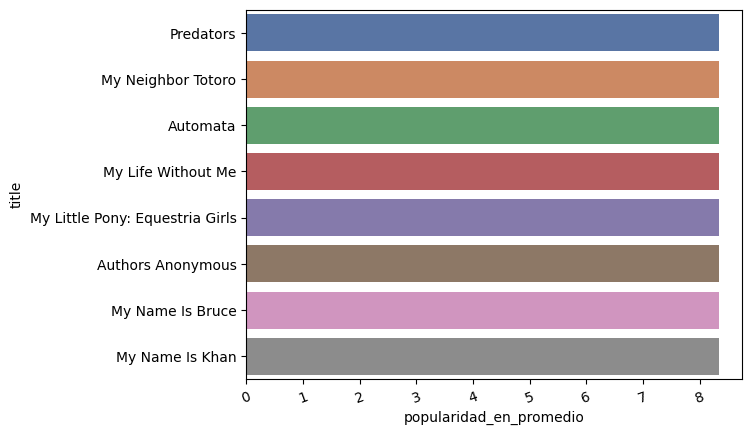

In [ ]:
# revisamos nuevamente  la popularidad en promedio por pelicula

da2=movies_copia[['title','popularity']].groupby('title')['popularity'].mean().reset_index(name='popularidad_en_promedio').sort_values(by='popularidad_en_promedio',ascending=False).head(8)
sns.barplot(data=da2, x='popularidad_en_promedio',y='title',orient='h',palette="deep").set_xticklabels(sns.barplot(data=da2, x='popularidad_en_promedio',y='title',orient='h',palette="deep").get_xticklabels(),rotation=20)
plt.show()

 - del grafico de barras se puede concluir que la imputacion de outliers tiene un efecto significativo en la popularidad de las peliculas (constante en los 8 primeros ) .

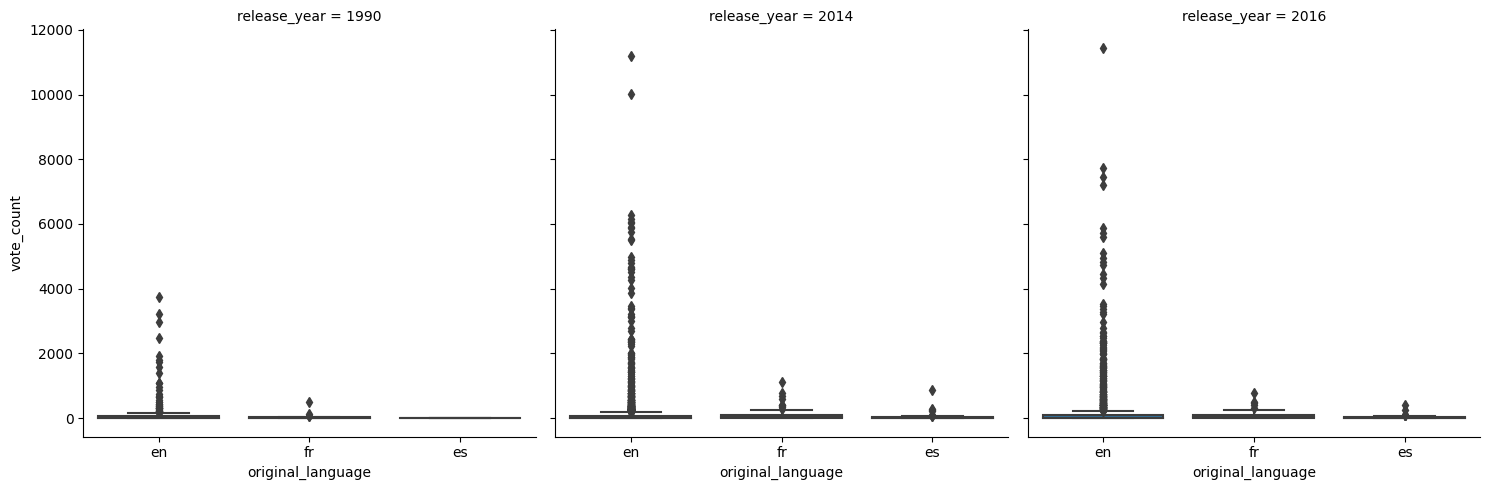

In [ ]:
# diagrama de caja para vote_count en original_language : 'en','fr' ,'es' para los años de lanzamiento 1990,2010 y 2016

idiomas = ['en','fr','es']
an= [2014,2016,1990]
wine_reviews_filtradas = movies[movies['original_language'].isin(idiomas) & movies['release_year'].isin(an) ]
sns.catplot(x="original_language", y="vote_count", col="release_year", kind='box' , data=wine_reviews_filtradas)
plt.show()

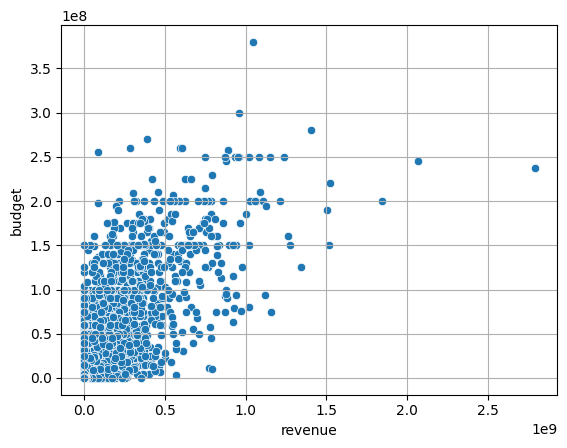

In [ ]:
# scaterplot para revenue y budget

ax = sns.scatterplot(x="revenue", y="budget", data=movies)
plt.grid()

 - De el diagrama se infiere que existe una pelicula que tuvo el presupuesto maximo de mas de 350 000000 y una ganancia de mas de 100 000 000 .

In [ ]:
# especificamente el scatterplot de arriba estaria representando por :

print('maximo presupuesto')
print(movies[['budget','revenue','title']].sort_values(by='budget',ascending=False).head(2))
print('------------------------')
print('maxima ganancias')
print(movies[['budget','revenue','title']].sort_values(by='revenue',ascending=False).head(2))

maximo presupuesto
           budget       revenue                                        title
1175  380000000.0  1.045714e+09  Pirates of the Caribbean: On Stranger Tides
228   300000000.0  9.610000e+08     Pirates of the Caribbean: At World's End
------------------------
maxima ganancias
            budget       revenue                         title
9037   237000000.0  2.787965e+09                        Avatar
33100  245000000.0  2.068224e+09  Star Wars: The Force Awakens


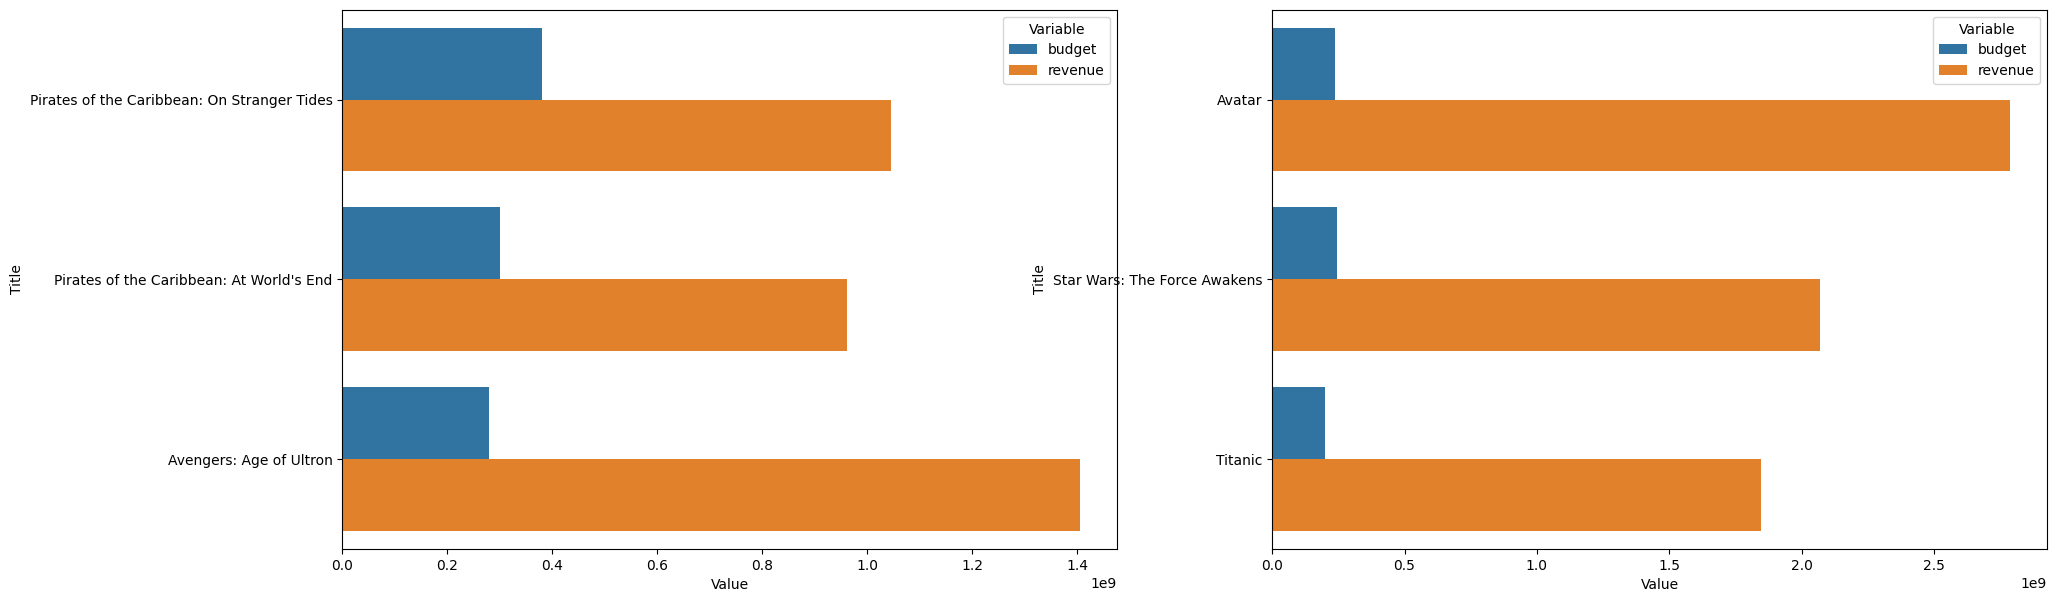

In [ ]:
# representacion en barras : pelicular con mayor presupuesto y mayor ganancias

fig, axs = plt.subplots(ncols=2,  figsize=(22, 7))
a=movies[['budget','revenue','title']].sort_values(by='budget',ascending=False).head(3).melt(id_vars='title').rename(columns=str.title)
b=movies[['budget','revenue','title']].sort_values(by='revenue',ascending=False).head(3).melt(id_vars='title').rename(columns=str.title)
sns.barplot(x= 'Value', y='Title', hue='Variable', data=a,orient='h' ,ax=axs[0])
sns.barplot(x= 'Value', y='Title', hue='Variable', data=b,orient='h' ,ax=axs[1])
plt.show()

 - del barplot anterior **pirates of the Caribean :On strangers Tides** registra  un mayor presupuesto 
 - **Avatar** registra una mayor ganancia

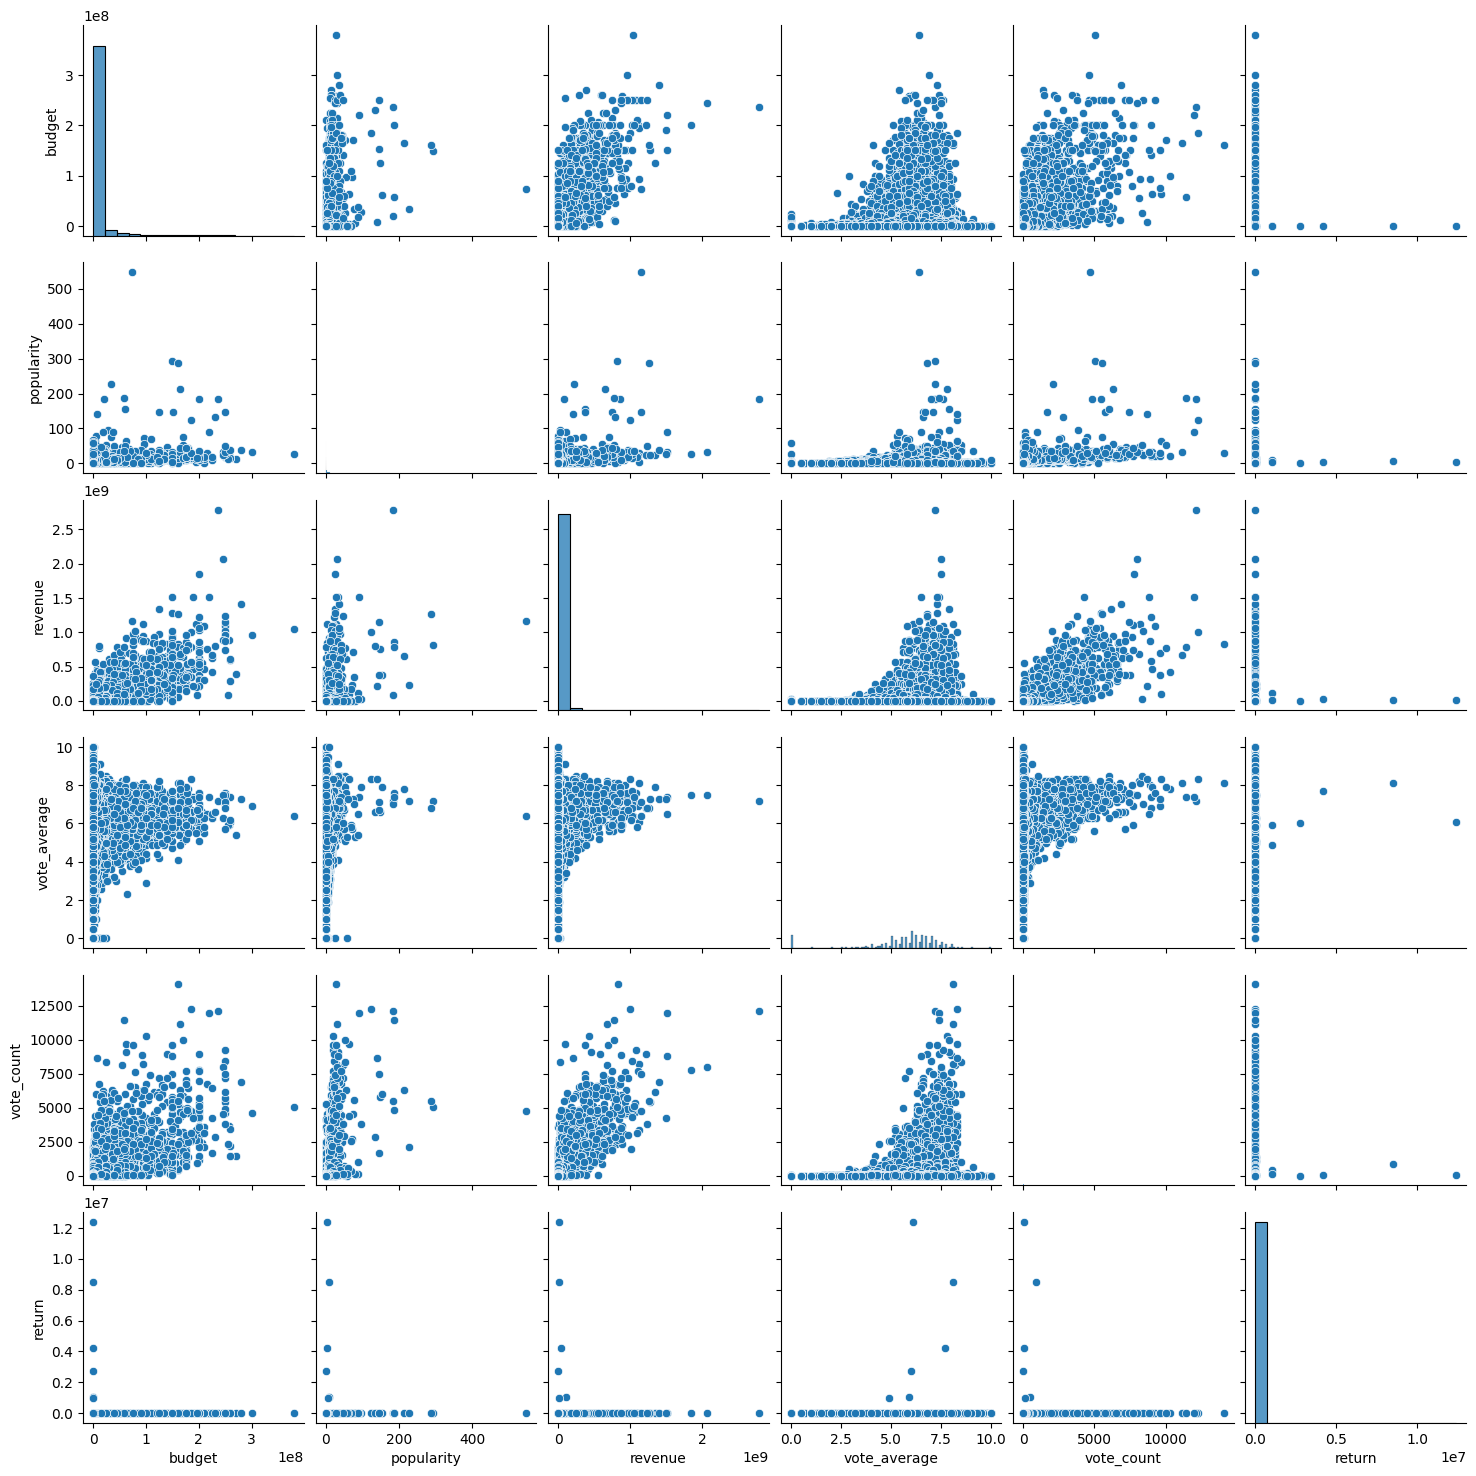

In [ ]:
# generalizamos:
# Para cada par de variables numéricas, generemos un scatterplot y en la diagonal grafica la distribucion de esos valores.

d=movies[['budget','popularity','revenue','vote_average','vote_count','return']]
sns.pairplot(data=d)

<Axes: >

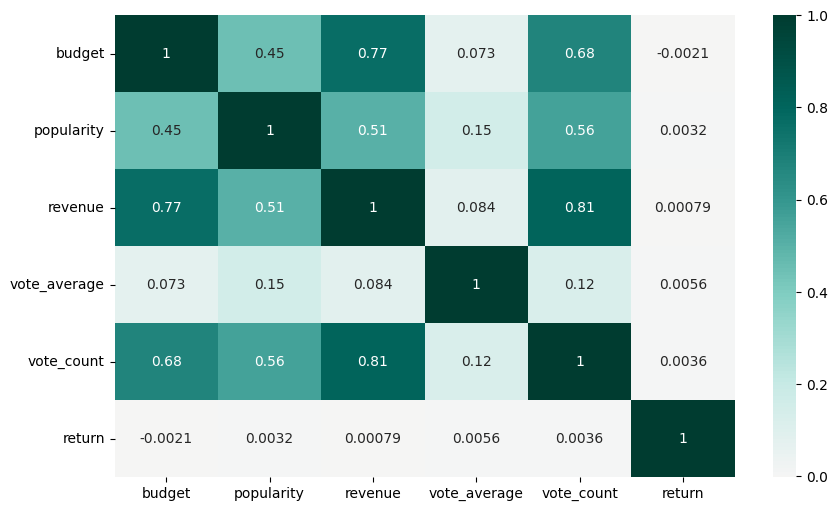

In [ ]:
#heatmap de variables numericas  : observacion las correlaciones de las variables numericas
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(d.corr(), center=0, cmap='BrBG', annot=True)

del diagrama de calor se puede observar la correlacion de las variables .

- **la variable revenue y vote_count tiene una correlacion fuerte**
- **la variable revenue y budget tiene una correlacion fuerte**

del heatmap se puede concluir que hay variables fuertemente correlacionadas como **budget y revenue**

In [ ]:
#heatmap de variables categoricas : observacion las correlaciones en las variables categoricas
import pandas as pd
from dython.nominal import associations
# heatmap en variables categoricas
dd=movies[['original_language','overview','status','tagline','title']].reset_index(drop=True)
c_com=associations(dd,filename='c_com.png',figsize=(8,8))

In [ ]:
df_corr=c_com['corr']
df_corr.dropna(axis=1,how='all').dropna(axis=0,how='all').style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

In [ ]:
#movies[['title','belongs_to_collection']].groupby('belongs_to_collection')['title'].count().reset_index(name='cantidad_de_la franquicia').sort_values(by='cantidad_de_la franquicia',ascending=False).iloc[1:7]